# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [45]:
!export PATH=/Library/TeX/texbin:$PATH

'export' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np

actions = ["North", "East", "West", "South", "Suck"]

def simple_randomized_agent(position, bumpers, dirty, rs):
    return np.random.choice(actions)

In [3]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True
position = [0,0]
rs = 5

# call agent program function with percepts and it returns an action
simple_randomized_agent(position, bumpers, dirty, rs)

'East'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. Use the same environmnt for all your agent implementations in the tasks below.

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# function for visualizing the agent and the room
def show_room(room, pos, fontSize = 24):  
    """display room and robot
    
    Parameters
    ----------
    room : bool 2d array
        Dirt locations in the room.
    pos : list of 2 int values
        x and y location of the robot.
    fint_size : int
        size of the robot symbol.
    """
    
    cmap = colors.ListedColormap(['white', 'gray'])
    
    room = np.copy(room)    
    room = room.astype(np.int64)
    
    fig, ax = plt.subplots()
    ax.imshow(room, cmap = cmap, norm = colors.BoundaryNorm(list(range(cmap.N+1)), cmap.N))
    
    plt.text(pos[1], pos[0], u"\u2B24", fontSize = fontSize,
                 horizontalalignment = 'center', verticalalignment = 'center')
    
    plt.show()

In [4]:
import random

# Your code and description goes here
def create_environment(roomSize, fontSize = 24):
    
    rs = roomSize
    probDirty = .2
    
    # set up room environment
    room = np.random.choice(a=[True,False], size=(rs,rs),p=[probDirty,1-probDirty])
    
    return room

In the code above, I set up my room environment that my vacuum agent will navigate and attempt to clean in the following sections.  This environment is fairly simple, taking in the agent and room size as parameters.  I created a variable called 'probDirty' which stores the probability of each individual square within my environment being dirty; at the moment it is set to .2 or 20%. After this, I constructed my environment giving it the size that was passed into the function and randomly assigning some of the squares to be dirty.  Finally, I returned the room variable which will be passed into my agent funtion later.

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [24]:
# Your code and description goes here
import random

def create_agent(agent, roomSize, max_steps, fontSize = 24):
    
    rs = roomSize
    ms = max_steps
    room = create_environment(rs)
    actions = 0
    
    # set initial random location
    x = random.randint(0,rs-1)
    y = random.randint(0,rs-1)
    position = [x,y]
    
    # calculates the total number of dirty cells
    totDirty = np.where(room == True)
    totDirty = len(totDirty[0])
    

    # define bumper percepts
    bumpers = {"North": False, "South": False, "East": False, "West": False}
    
    if(y == 0):
        bumpers["North"] = True
    else:
        bumpers["North"] = False
    if(y == rs-1):
        bumpers["South"] = True
    else:
        bumpers["South"] = False
    if(x == rs-1):
        bumpers["East"] = True
    else:
        bumpers["East"] = False
    if(x == 0):
        bumpers["West"] = True
    else:
        bumpers["West"] = False
    
    # only used by model-based agent, commented out when using simple reflex
    # actions = find_corner(bumpers, room, position)
    # x = 0
    # y = 0
    # position = [x,y]
    # global pastMove
    # pastMove = "North"
    # only used by model-based agent, commented out when using simple reflex
        
    while(totDirty > 0 and actions < ms):
        d = room[x][y]
        move = agent(position, bumpers, d, rs)
        # show_room(room, position)
        
        # defines the different percepts of each agent
        if(move != 'Suck'):
            actions = actions + 1
        if(move == "Suck"):
            actions = actions + 1
            if(room[x][y] == True):
                room[x][y] = False
                totDirty = totDirty-1
        if(move == "North" and y > 0):
            y = y-1
        if(move == "South" and y < rs-1):
            y = y+1
        if(move == "East" and x < rs-1):
            x = x+1
        if(move == "West" and x > 0):
            x = x-1
        if(x == 0):
            bumpers["West"] = True
        else:
            bumpers["West"] = False
        if(y == 0):
            bumpers["North"] = True
        else:
            bumpers["North"] = False
        if(x == rs-1):
            bumpers["East"] = True
        else:
            bumpers["East"] = False
        if(y == rs-1):
            bumpers["South"] = True
        else:
            bumpers["South"] = False
            
        position[0] = x
        position[1] = y
    
    return int(actions)

In [6]:
import random

# function is called each time create_agent function passes through while loop
def simple_reflex_agent(position, bumpers, isDirty, roomSize):
    
    rs = roomSize
    
    # lists possible moves given different situations
    anyMove = ["North", "South", "East", "West"] # options when any move available
    topEnviro = ["South", "East", "West"] # options when at very top of environment
    bottomEnviro = ["North", "East", "West"] # options when at bottom of the environment
    leftEnviro = ["North", "South", "East"] # options when at West edge of the environment
    rightEnviro = ["North", "South", "West"] # options when at East edge of the environment
    nwCorner = ["South", "East"] # options when at NW corner of the environment
    neCorner = ["South", "West"] # options when at NE corner of the environment
    seCorner = ["North","West"] # options when at SE corner of the environment
    swCorner = ["North", "East"] # options when at SW corner of the environment
    
    # what to do given each situation
    if(isDirty == True):
        return ("Suck")
    if(bumpers == {"North": False, "South": False, "East": False, "West": False}):
        return (random.choice(anyMove))
    if(bumpers == {"North": True, "South": False, "East": False, "West": False}):
        return (random.choice(topEnviro))
    if(bumpers == {"North": False, "South": True, "East": False, "West": False}):
        return (random.choice(bottomEnviro))
    if(bumpers == {"North": False, "South": False, "East": False, "West": True}):
        return (random.choice(leftEnviro))
    if(bumpers == {"North": False, "South": False, "East": True, "West": False}):
        return (random.choice(rightEnviro))
    if(bumpers == {"North": True, "South": False, "East": False, "West": True}):
        return (random.choice(nwCorner))
    if(bumpers == {"North": True, "South": False, "East": True, "West": False}):
        return (random.choice(neCorner))
    if(bumpers == {"North": False, "South": True, "East": True, "West": False}):
        return (random.choice(seCorner))
    if(bumpers == {"North": False, "South": True, "East": False, "West": True}):
        return (random.choice(swCorner))

<ipython-input-3-7903b09a1f0f>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(pos[1], pos[0], u"\u2B24", fontSize = fontSize,


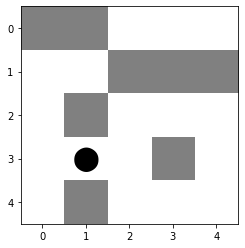

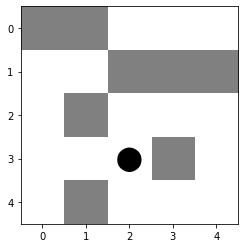

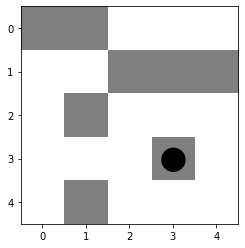

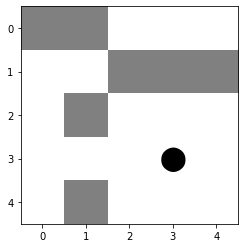

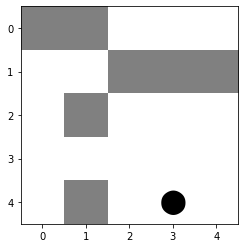

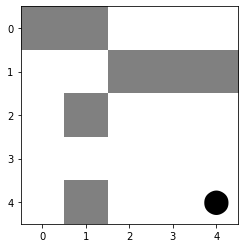

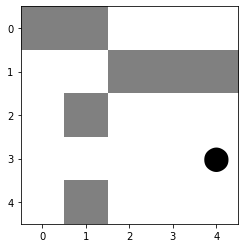

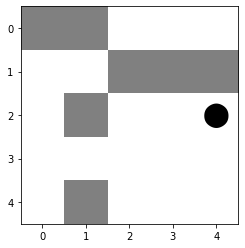

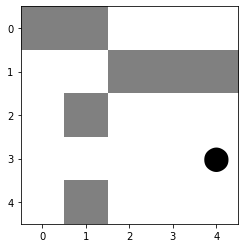

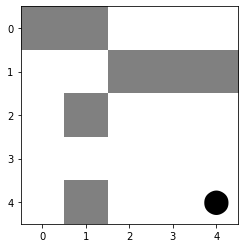

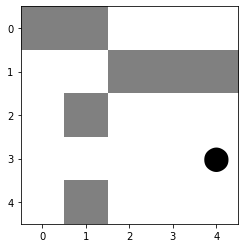

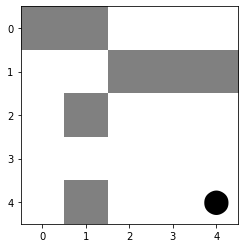

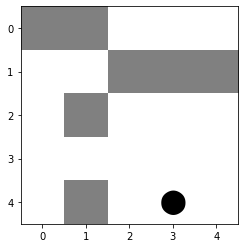

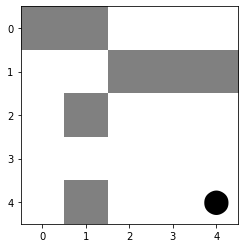

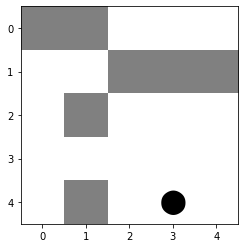

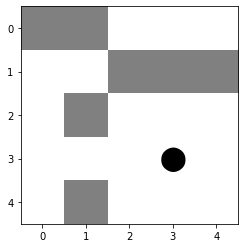

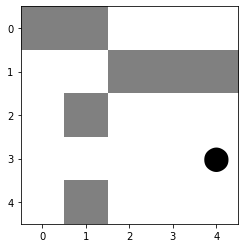

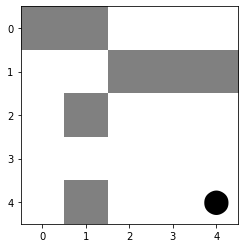

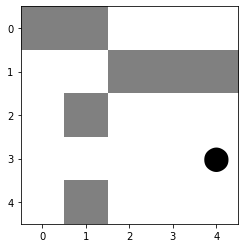

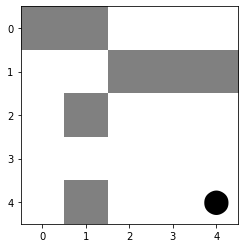

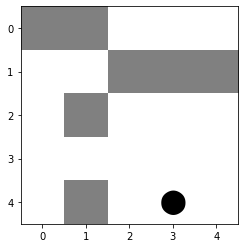

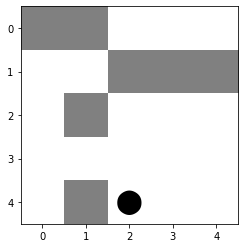

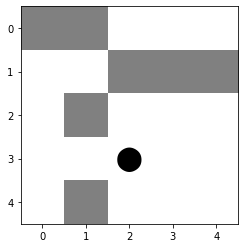

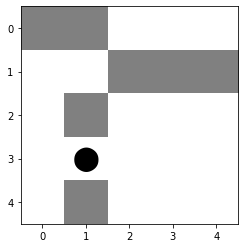

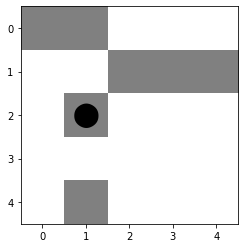

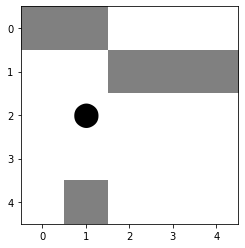

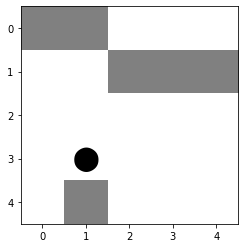

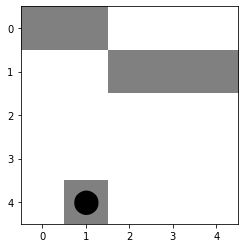

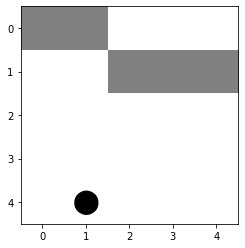

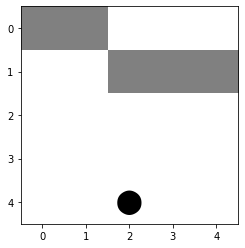

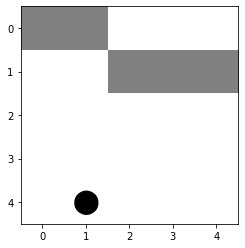

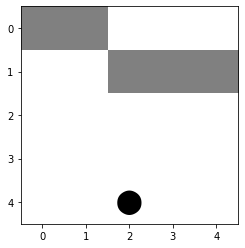

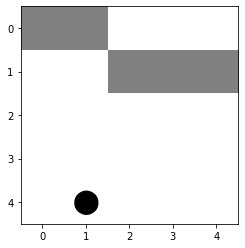

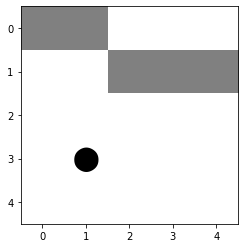

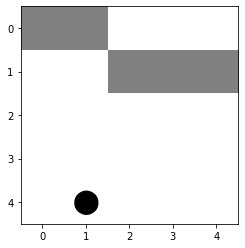

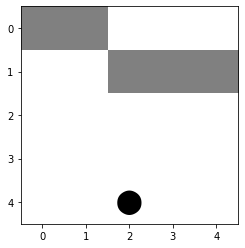

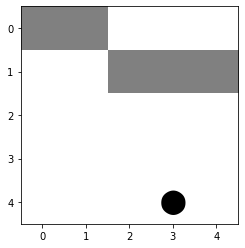

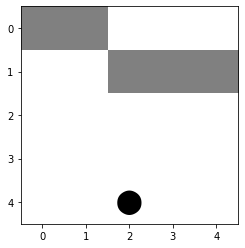

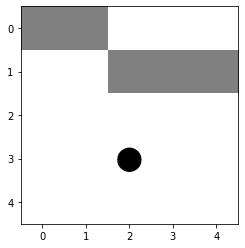

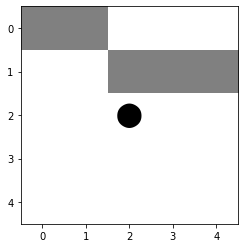

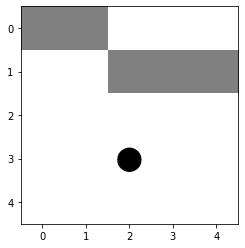

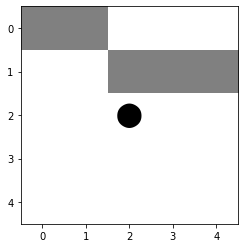

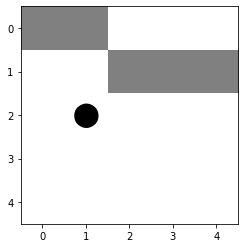

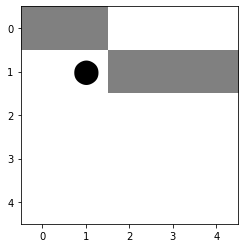

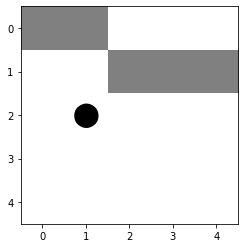

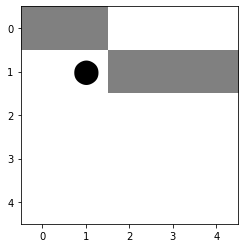

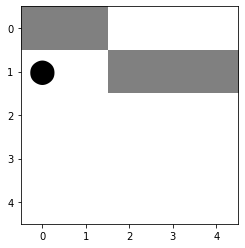

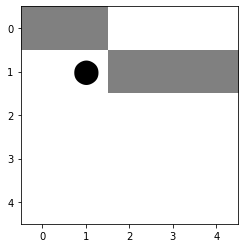

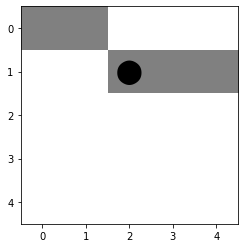

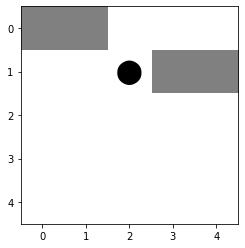

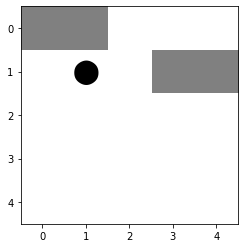

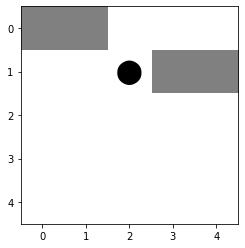

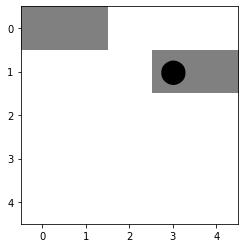

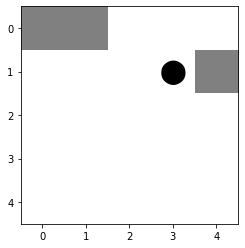

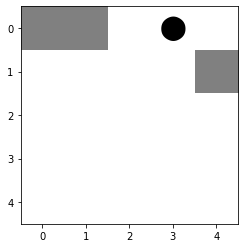

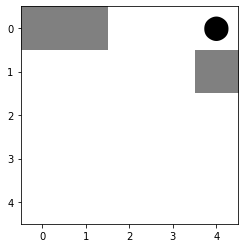

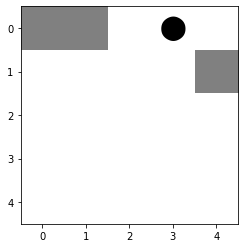

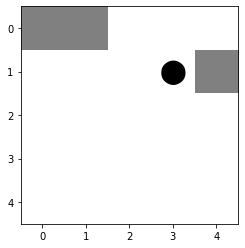

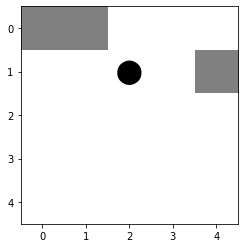

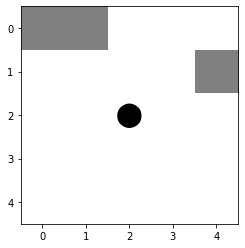

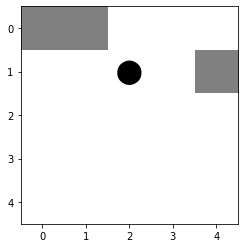

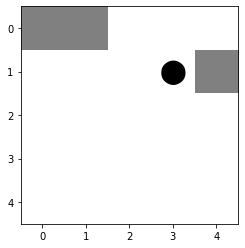

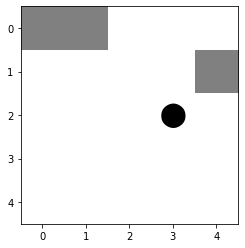

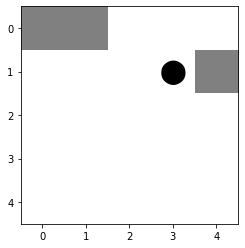

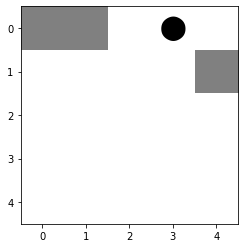

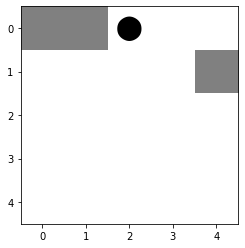

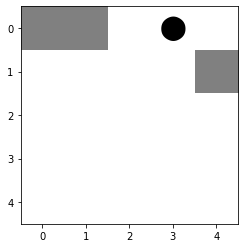

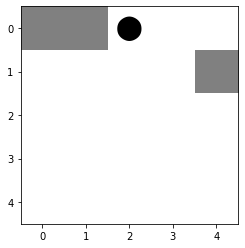

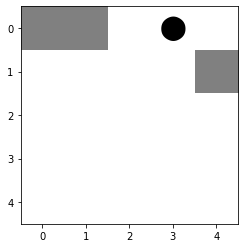

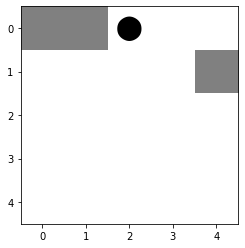

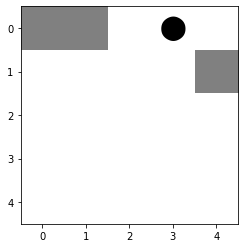

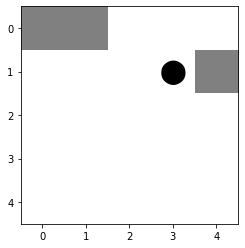

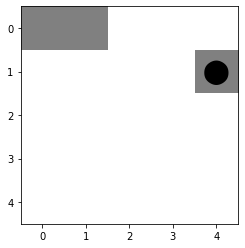

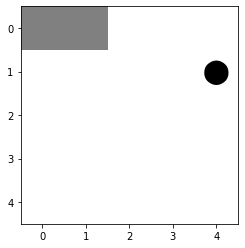

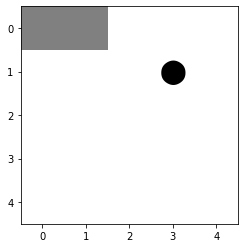

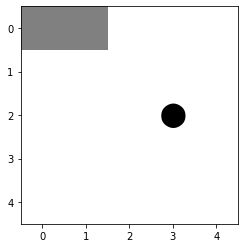

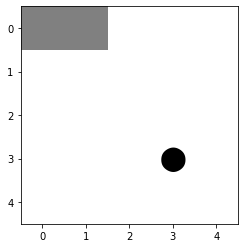

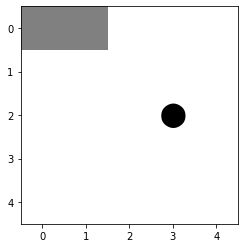

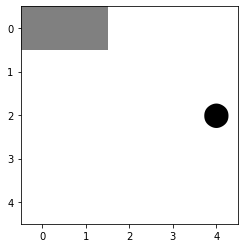

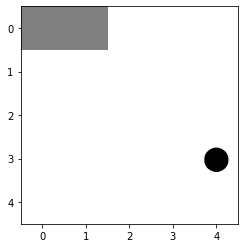

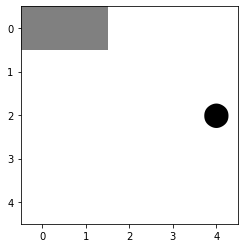

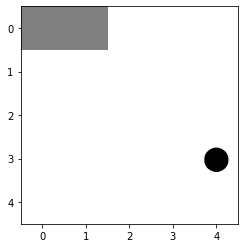

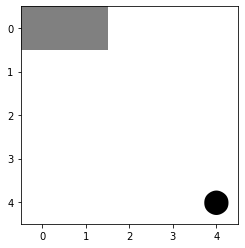

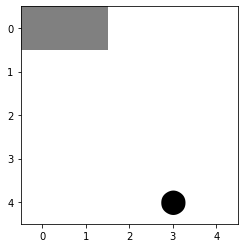

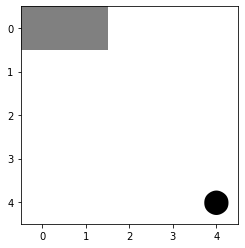

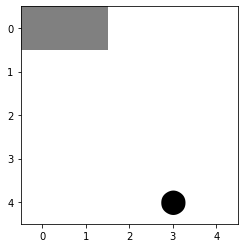

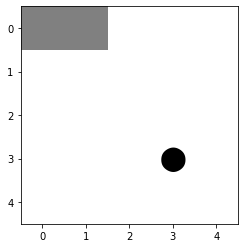

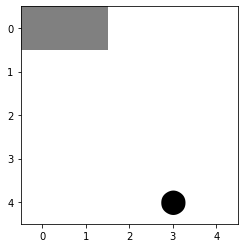

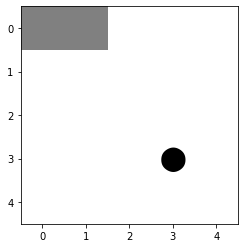

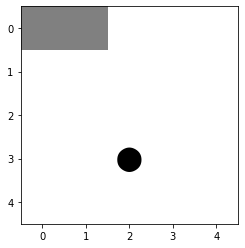

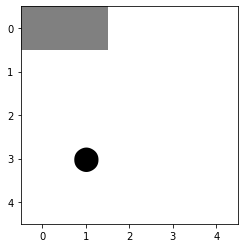

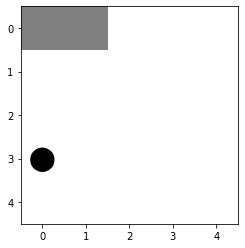

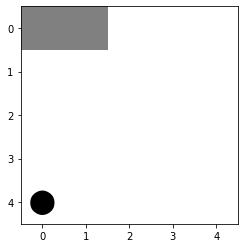

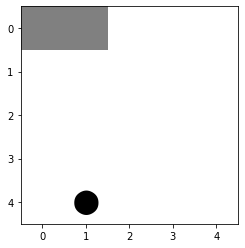

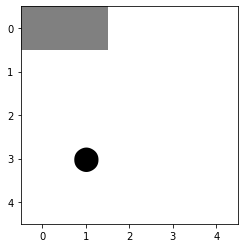

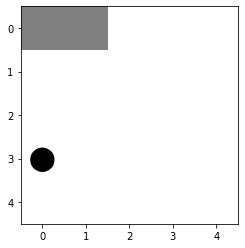

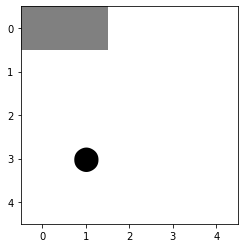

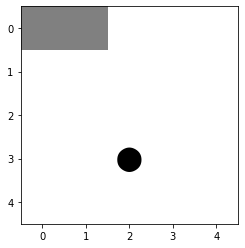

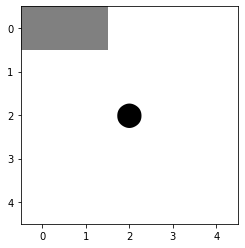

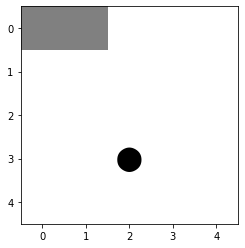

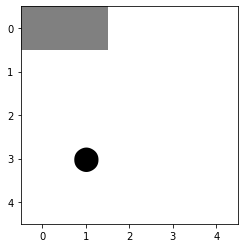

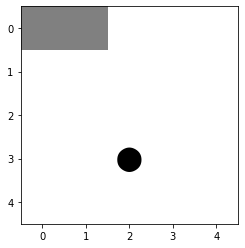

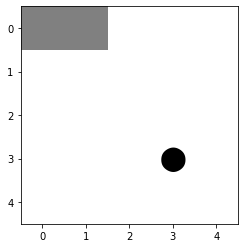

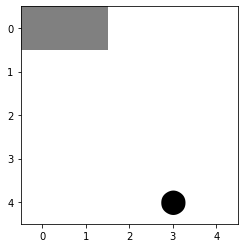

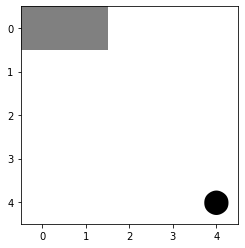

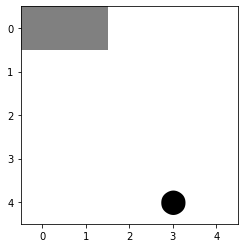

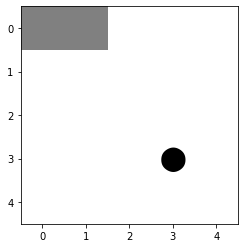

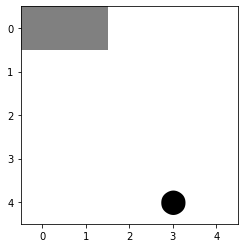

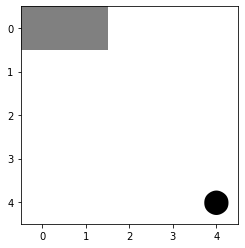

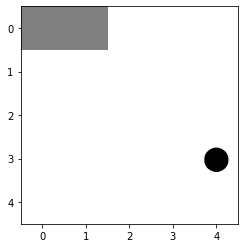

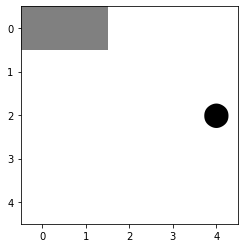

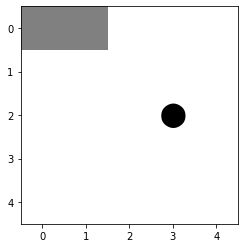

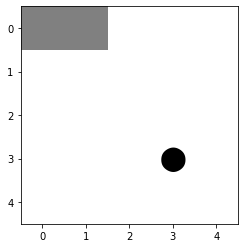

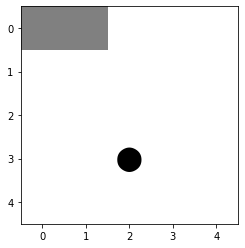

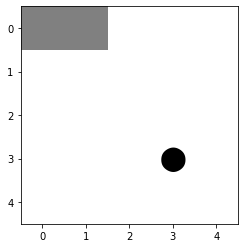

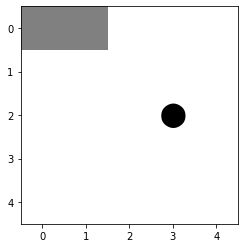

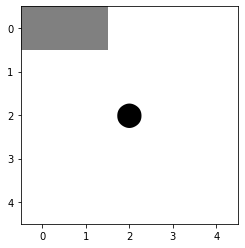

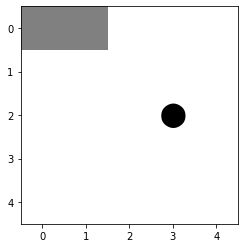

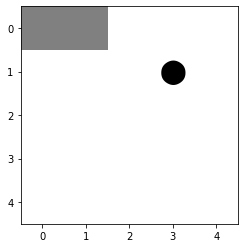

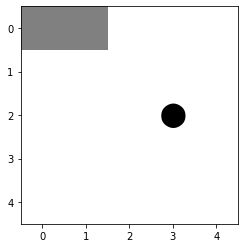

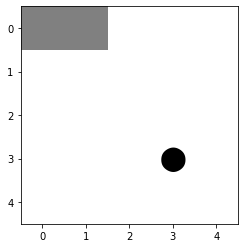

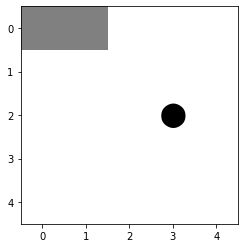

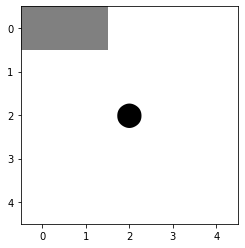

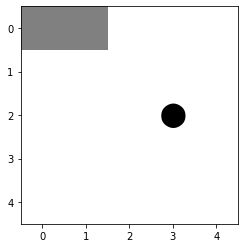

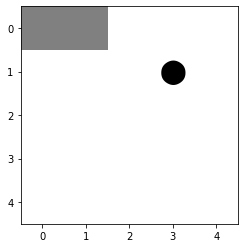

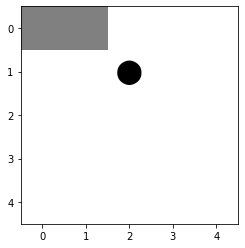

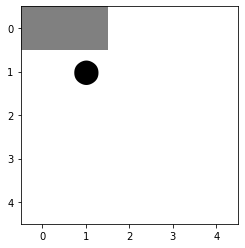

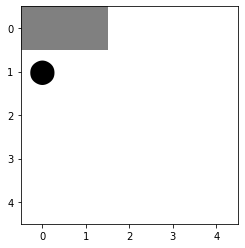

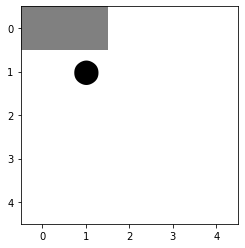

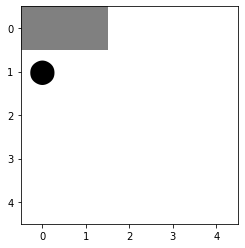

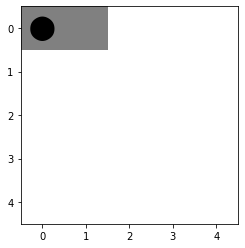

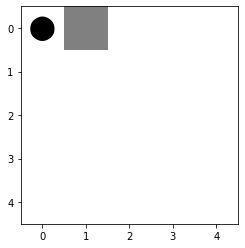

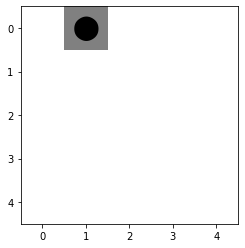

133

In [12]:
create_agent(simple_reflex_agent, 5, 250)

The first code segment above serves as a function that will be used for all of the agents I create in this assignment.  The creaet_agent function starts by calling my create_environment function that I created in part 1 which creates the simulation environment and randomly fills it with both clean and dirty squares.  After calling the create_environment function, it randomly places the vacuum within the environment and stores the vacuum's location in the position variable.  After this, it totals up the total amount of dirty squares and saves this number in the totDirty variable.  Once this has been set up, the function defines the different bumpers within the vacuum and defines the situations that will activate each individual percept.  Finally, this function runs a while loop which calls upon the agent function and keeps running until the total number of dirty squares equals zero.  While doing this, the function also keeps track of each individual action made by the vacuum and returns this number in the end.  The second function serves to define the behavior of our first agent, the simple reflex agent.  The first part of this function creates 9 different variables which store the different action options that the vacuum has given specfic criteria.  For example, if the vacuum is in the NorthEast corner of the environment it can only move South or West, if the vacuum is not at any edge of the environment it can move in any direction, etc.  After these situational variables have been defined, the function includes several if statements which decide which variable to call on depending on the percept information given by the bumpers.  In nearly all of these cases there are several different directions that the vacuum can move in and when this happens the function randomly returns one of the different movement directions depending on the situational variables above.

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

In [7]:
# Your code goes here
def find_corner(bumpers, room, position):
    
    corner = False
    x = position[0]
    y = position[1]
    actions = 0
    
    while(corner == False):
        position = [x,y]
        # show_room(room, position)
        actions = actions+1
        
        # seeks to find the NorthWest corner using it as a starting place
        if(y > 0):
            y = y-1
        if(x > 0):
            x = x-1
        if (y == 0 and x == 0):
            corner = True
            
    return int(actions)

In [8]:
# function is called each time create_agent function passes through while loop
pastMove = "North"

def model_based_reflex_agent(position, bumpers, isDirty, roomSize):
    
    rs = roomSize
    x = position[0]
    y = position[1]
    global pastMove
    
    if(isDirty == True):
        return "Suck"
    if(pastMove == "North"):
        pastMove = "East"
        return "East"
    if(pastMove == "East" and bumpers["East"] != True):
        pastMove = "East"
        return "East"
    if(pastMove == "East" and bumpers["East"] == True):
        pastMove = "South"
        return "South"
    if(pastMove == "South" and bumpers["East"] == True):
        pastMove = "West"
        return "West"
    if(pastMove == "South" and bumpers["West"] == True):
        pastMove = "East"
        return "East"
    if(pastMove == "West" and bumpers["West"] != True):
        pastMove = "West"
        return "West"
    if(pastMove == "West" and bumpers["West"] == True):
        pastMove = "South"
        return "South"        

<ipython-input-3-7903b09a1f0f>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(pos[1], pos[0], u"\u2B24", fontSize = fontSize,


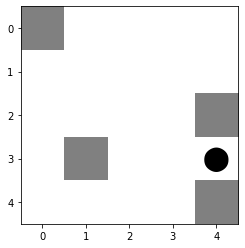

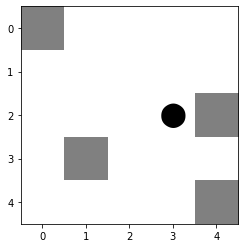

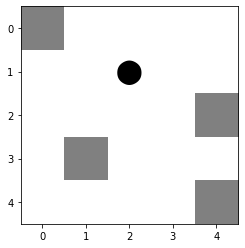

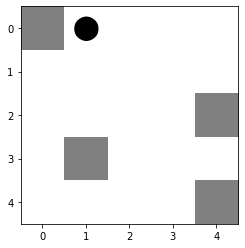

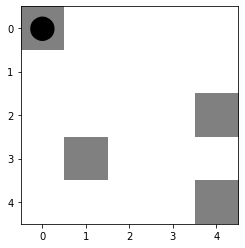

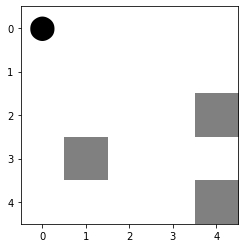

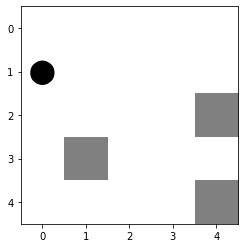

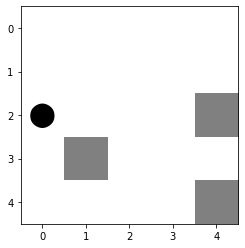

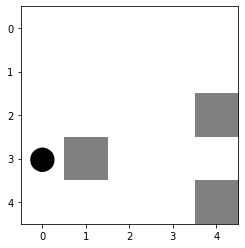

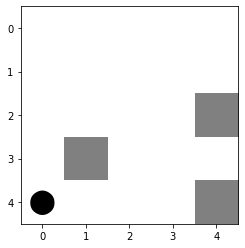

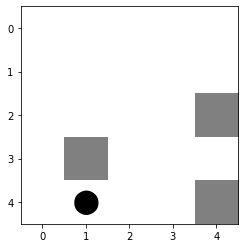

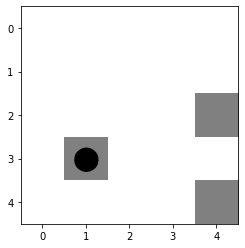

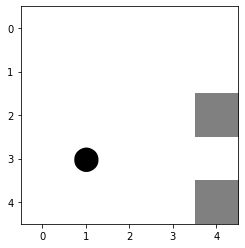

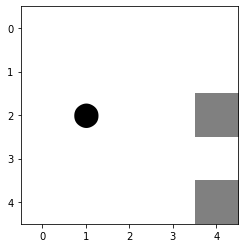

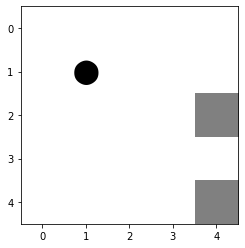

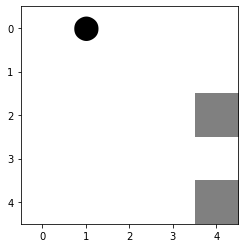

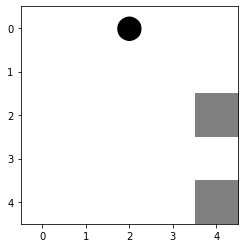

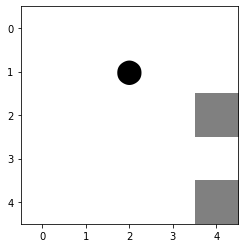

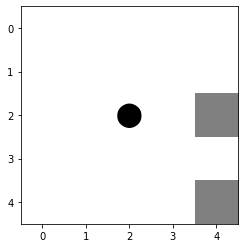

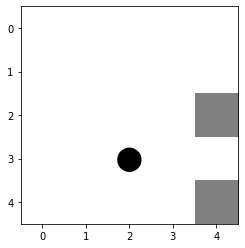

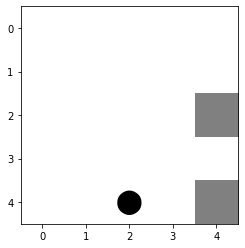

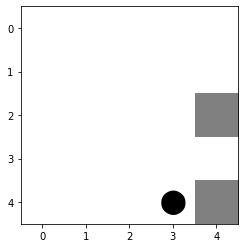

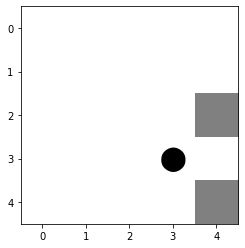

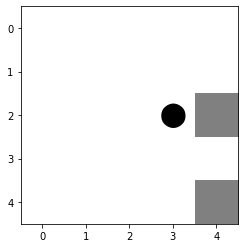

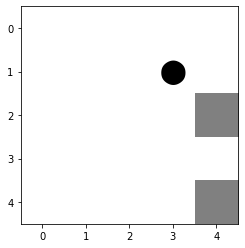

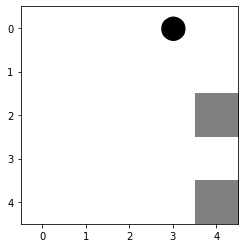

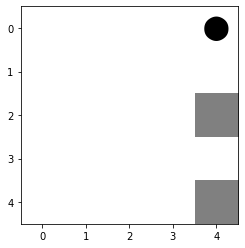

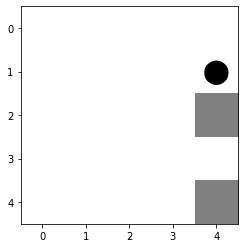

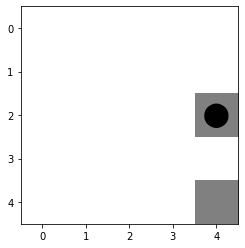

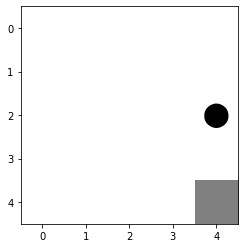

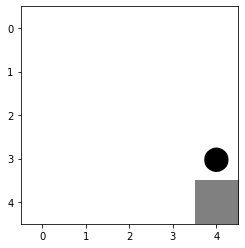

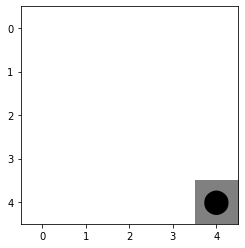

32

In [9]:
create_agent(model_based_reflex_agent, 5, 250)

In the code above, I created two different functions which are essential to my model-based agent.  The first function, find_corner, serves to get the vacuum to the NorthWest corner of the room using this location as a starting place allowing the vacuum to iteratively search the remainder of the room from here.  Within this function, the vacuum ignores whether squares or dirty or clean instead electing to simply find the corner before starting the cleaning process. The function is called at the start of the action steps within the create_agent function above and uses a while loop to search for the corner while also keeping track of the number of actions it takes to do so ultimately returning this number. The second function provides the core of the functionality for the model_based agent.  The first thing I did was create a global variable which stores the previous state information which is critical to each sequential move made by the model-based agent.  After this, I created a serious of if statements that define the different actions that can be made by the model-based agent given different unique situations.  This conditional logic takes into account both the previous state as well as the information given by the percepts in order to logically work the vacuum around the room seeking to clean the room as efficiently as possible.  As seen by the output above, this agent works incredibly more efficiently than either of the first two agents.

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [9]:
# function for random agent
def rando(max_steps, roomSize):
    arr = [] # stores results
    numRuns = 100 
    count = 1
    while count < numRuns:
        currRun = create_agent(simple_randomized_agent, roomSize, max_steps)
        count = count+1
        arr.append(currRun) 
    return arr

# function for reflex agent
def reflex(max_steps, roomSize):
    arr = [] # stores results
    numRuns = 100 
    count = 1
    while count < numRuns:
        currRun = create_agent(simple_reflex_agent, roomSize, max_steps)
        count = count+1
        arr.append(currRun) 
    return arr

# function for model-based agent
def model(max_steps, roomSize):
    arr = [] # stores results
    numRuns = 100 
    count = 1
    while count < numRuns:
        currRun = create_agent(model_based_reflex_agent, roomSize, max_steps)
        count = count+1
        arr.append(currRun) 
    return arr

<function matplotlib.pyplot.show(close=None, block=None)>

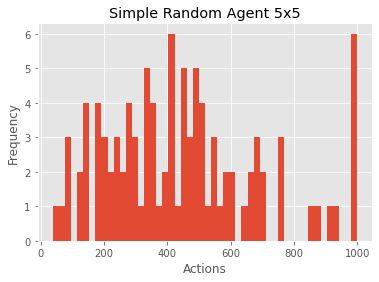

In [25]:
# Your graphs and discussion of the results goes here
import matplotlib.pyplot as plt

plt.style.use('ggplot')
rand5 = rando(1000, 5)
plt.hist(rand5, bins=50)
plt.title('Simple Random Agent 5x5')
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

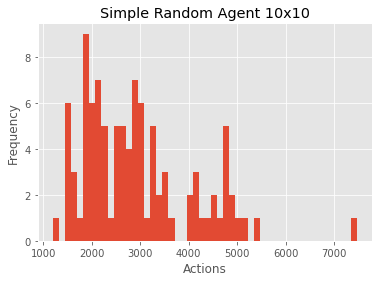

In [26]:
plt.style.use('ggplot')
rand10 = rando(50000, 10)
plt.hist(rand10, bins=50)
plt.title('Simple Random Agent 10x10')
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

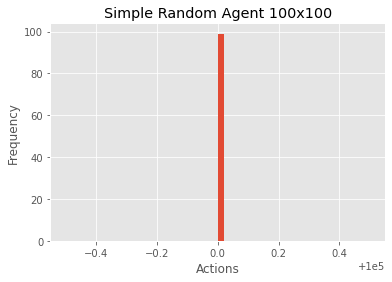

In [20]:
plt.style.use('ggplot')
rand100 = rando(100000, 100)
plt.hist(rand100, bins=50)
plt.title('Simple Random Agent 100x100')
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

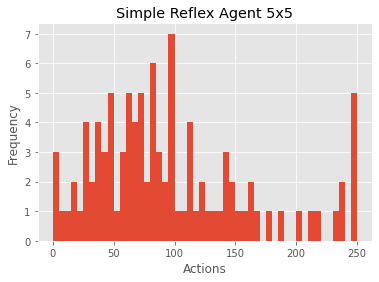

In [11]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
ref5 = reflex(250, 5)
plt.hist(ref5, bins=50)
plt.title('Simple Reflex Agent 5x5')
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

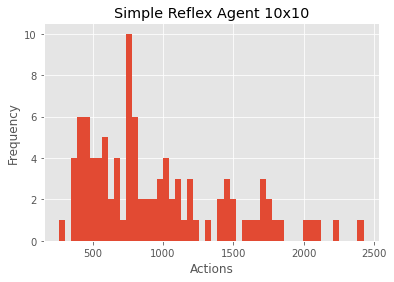

In [12]:
plt.style.use('ggplot')
ref10 = reflex(10000, 10)
plt.hist(ref10, bins=50)
plt.title('Simple Reflex Agent 10x10')
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

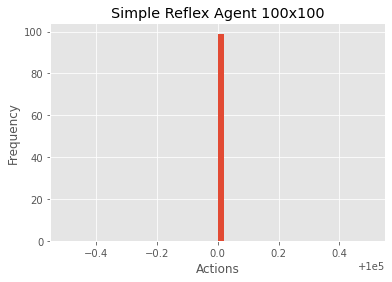

In [13]:
plt.style.use('ggplot')
ref100 = reflex(100000, 100)
plt.hist(ref100, bins=50)
plt.title('Simple Reflex Agent 100x100')
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

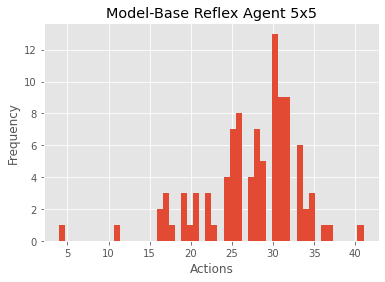

In [16]:
plt.style.use('ggplot')
mod5 = model(250, 5)
plt.hist(mod5, bins=50)
plt.title('Model-Base Reflex Agent 5x5')
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

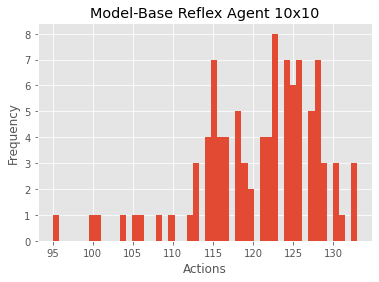

In [18]:
plt.style.use('ggplot')
mod10 = model(10000, 10)
plt.hist(mod10, bins=50)
plt.title('Model-Base Reflex Agent 10x10')
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

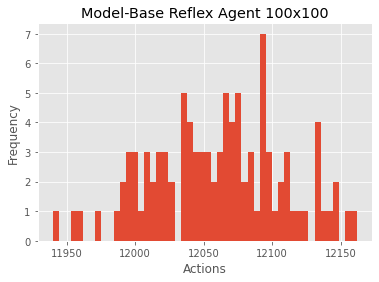

In [19]:
plt.style.use('ggplot')
mod100 = model(100000, 100)
plt.hist(mod100, bins=50)
plt.title('Model-Base Reflex Agent 100x100')
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.show

In [31]:
from statistics import mean

random5Mean = mean(rand5)
random10Mean = mean(rand10)
random100Mean = mean(rand100)
reflex5Mean = mean(ref5)
reflex10Mean = mean(ref10)
reflex100Mean = mean(ref100)
model5Mean = mean(mod5)
model10Mean = mean(mod10)
model100Mean = mean(mod100)

print("The average actions taken by the random agent are:")
print("\t 5x5: " + str(random5Mean))
print("\t 10x10: " + str(random10Mean))
print("\t 100x100: " + str(random100Mean))
print("The average actions taken by the reflex agent are:")
print("\t 5x5: " + str(reflex5Mean))
print("\t 10x10: " + str(reflex10Mean))
print("\t 100x100: " + str(reflex100Mean))
print("The average actions taken by the model-based agent are:")
print("\t 5x5: " + str(model5Mean))
print("\t 10x10: " + str(model10Mean))
print("\t 100x100: " + str(model100Mean))

The average actions taken by the random agent are:
	 5x5: 447.45454545454544
	 10x10: 2918.6666666666665
	 100x100: 100000
The average actions taken by the reflex agent are:
	 5x5: 96.81818181818181
	 10x10: 953.1414141414141
	 100x100: 100000
The average actions taken by the model-based agent are:
	 5x5: 27.424242424242426
	 10x10: 120.74747474747475
	 100x100: 12060.373737373737


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 447.45 | 96.82 | 27.42  |
| 10x10   | 2918.67 | 953.14 | 120.75 |
| 100x100 | 100000| 100000 | 12060.37 |

Add charts to compare the performance of the different agents.

The code above is used to generate graphs that show the results of running each agent 100 times on datasets of size 5x5, 10x10, and 100x100 as well as calculate the mean number of actions for each of these runs.  As you can see, the model-based agent performs significantly better than the other two agents and is able to successfully clean a 100x100 sized room in an average of around 12,000 actions.  On the other hand, the performance of the randomized and simple reflex agent deteriorates dramatically as the size of the room increases with neither of these two agents being able to fully clean the 100x100 sized room before reaching the limit of 100,000 moves (actions).  This is right along the lines of what I would have expected from these two agents as they stumble blindly around the environment with only the second using any of the imput from its percepts in order to decide where to go.  The saved state information of the model-based agent and the model it utilizes are able to optimize this agent to perform significantly better than the other two.

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how your agent implementations will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

Generally speaking, neither of the agents I created are very robust with the simple-random agent being even less robust that the model-based agent.  In the scenario of a rectangular room of unkown size, the model-based agent would be able to navigate this environment with a decent amount of efficiency utilizing the data given by its different percepts as well as its previous state data in order to successfully clean the room while the simple-reflex agent would just stumble around blindly until it miraculously cleaned the room or ran out of battery.  As the environment becomes even slightly more complex than a rectangular room, even the model-based agent will start to fail.  There are currently no functions or conditional logic within the function for my model-based agent to deal with any of this irregularity and once the model passed from one room to the other (through the hallway), it would not be able to get back to clean any missed spots in the other room.  Additionally, if the room contained any obstacles, my model-based agent function does not have any conditional logic to get around these obstacles while staying on its path and would rather think that it has reached one of the walls within the room.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [ ]:
# Your code and discussion goes here

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code